In [16]:
import pandas as pd
data = pd.read_csv('r8-train-all-terms.txt', sep="\t", header=None)
data.columns =['label','text']
data['text_count'] = data['text'].apply(lambda x: len(str(x)))
data

,label,text,text_count
0,earn,champion products ch approves stock split cham...,361
1,acq,computer terminal systems cpml completes sale ...,1246
2,earn,cobanco inc cbco year net shr cts vs dlrs net ...,221
3,earn,am international inc am nd qtr jan oper shr lo...,465
4,earn,brown forman inc bfd th qtr net shr one dlr vs...,151
...,...,...,...
5480,earn,kelly oil and gas partners kly year dec shr ct...,93
5481,money-fx,japan seeks to strengthen paris currency accor...,2051
5482,earn,tcw convertible securities cvt sets dividend t...,335
5483,money-fx,south korean won fixed at month high the bank ...,268


In [17]:
data['text_count'].describe()

count    5485.000000
mean      605.465998
std       712.017123
min        30.000000
25%       165.000000
50%       375.000000
75%       686.000000
max      5295.000000
Name: text_count, dtype: float64

(array([2840., 1596.,  251.,    0.,  108.,   41.,    0.,  253.,  190.,
         206.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

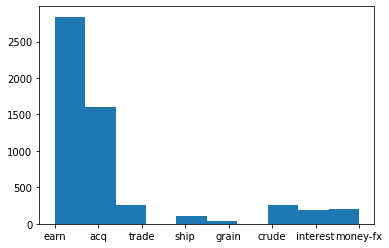

In [3]:
import matplotlib.pyplot as plt
plt.hist(data['label']) #most quereies labeled as earn. highly unbalanced

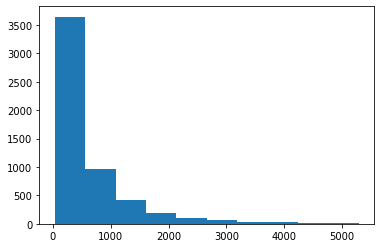

In [4]:
plt.hist(data['text_count'], bins = 10)
plt.show()

In [5]:
import nltk
from nltk.corpus import stopwords
try:
    stopwords = stopwords.words('english')
    print(stopwords)
except:
    nltk.download('stopwords')


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
# Document Term matrix features/frequency
#https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/
#https://programminghistorian.org/en/lessons/analyzing-documents-with-tfidf
# CountVectorizer: you can create a matrix of document and words by counting the occurrence of words in the given document. 
# This matrix is known as Document-Term Matrix(DTM).
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
#max_df is used for removing terms that appear too frequently,
#min_df is used for removing terms that appear too infrequently.
#pruning doesnt effect much if we use tfdif
#we reduce features to make it less overfitt
count_vect = CountVectorizer(max_features=2000,lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
# count_vect = CountVectorizer()



In [7]:
X_train_counts = count_vect.fit_transform(data['text'])
X_train_counts.shape

(5485, 19956)

In [8]:
print(len(count_vect.get_feature_names()))
print(count_vect.get_feature_names()[:10])


19956
['aa', 'aaa', 'aac', 'aachener', 'aagiy', 'aaix', 'aam', 'aancor', 'aap', 'aar']


In [9]:
#  calculating the logarithm so that it wont give more weightage.
#https://medium.com/@sdinesh718/introduction-to-term-frequency-inverse-document-frequency-tf-idf-in-natural-language-processing-3ec503ddbdab
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#fit here gets count and then to vector unlike test data : bag of words
X_train_tfidf.shape

(5485, 19956)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_train_tfidf, data['label'], test_size=0.3, random_state=1)

In [11]:
# https://www.geeksforgeeks.org/applying-multinomial-naive-bayes-to-nlp-problems/
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))


MultinomialNB Accuracy: 0.8031591737545565


In [12]:
data2 = pd.read_csv('r8-test-all-terms.txt', sep="\t", header=None)
data2.columns =['label','text']


X_test_counts = count_vect.transform(data2['text'])
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

predicted = clf.predict(X_test_tfidf)
import numpy as np
np.mean(predicted == data2['label'])

0.7980813156692553

In [13]:
labels = data2['label'].unique()
labels

array(['trade', 'grain', 'ship', 'acq', 'earn', 'money-fx', 'interest',
       'crude'], dtype=object)

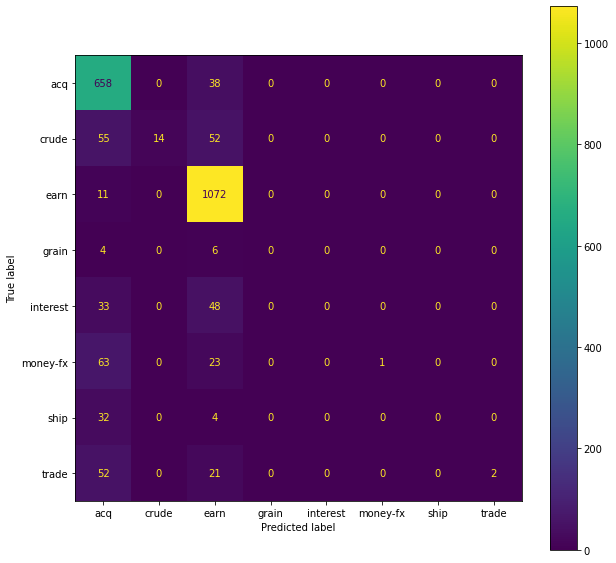

In [14]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))

plot_confusion_matrix(clf, X_test_tfidf, data2['label'], ax=ax)





In [15]:
print(metrics.classification_report(data2['label'], predicted, 
labels = labels))

              precision    recall  f1-score   support

       trade       1.00      0.03      0.05        75
       grain       0.00      0.00      0.00        10
        ship       0.00      0.00      0.00        36
         acq       0.72      0.95      0.82       696
        earn       0.85      0.99      0.91      1083
    money-fx       1.00      0.01      0.02        87
    interest       0.00      0.00      0.00        81
       crude       1.00      0.12      0.21       121

    accuracy                           0.80      2189
   macro avg       0.57      0.26      0.25      2189
weighted avg       0.78      0.80      0.73      2189



C:\Users\asmna\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asmna\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asmna\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo